In [426]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Loading and splitting data

In [380]:
df=pd.read_csv("../data/train.csv")

In [381]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  

In [382]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [383]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.25)
xtrain,xval,ytrain,yval=train_test_split(xtrain,ytrain,test_size=0.15)

## Cleaning Data Train

In [384]:
xtrain_null= xtrain.isnull().sum()[xtrain.isnull().sum() > 0]

In [385]:
xtrain_null.sort_values(ascending=True)

MasVnrType        5
MasVnrArea        5
BsmtFinType2     28
BsmtQual         28
BsmtCond         28
BsmtFinType1     28
BsmtExposure     29
GarageCond       57
GarageQual       57
GarageFinish     57
GarageType       57
GarageYrBlt      57
LotFrontage     157
FireplaceQu     452
Fence           738
Alley           869
MiscFeature     891
PoolQC          923
dtype: int64

 Remove the row where electrical is null

In [386]:
xtrain=xtrain.dropna(subset="Electrical")

In [387]:
xtrain_null= xtrain.isnull().sum()[xtrain.isnull().sum() > 0]

* ID column isn't usefull to predict a house price so I will remove it
* GarageYrBlt has a lot of missing value, and we have a lot of other 
<br>
  features related to the garage so I will remove it too 

In [388]:
def delete_columns(df):
    df=df.drop(["Id","GarageYrBlt"],axis=1)
    return df

In [389]:
xtrain=delete_columns(xtrain)

## Sort features by type

In [390]:
categorical_features=[features for features in xtrain.columns if xtrain[features].dtype=="O"]
numerical_features=[features for features in xtrain.columns if xtrain[features].dtype!="O"]


###  Update missing categorical values

In [391]:

xtrain[categorical_features].isnull().sum().sort_values(ascending=False)

PoolQC           923
MiscFeature      891
Alley            869
Fence            738
FireplaceQu      452
GarageType        57
GarageCond        57
GarageQual        57
GarageFinish      57
BsmtExposure      29
BsmtFinType1      28
BsmtFinType2      28
BsmtQual          28
BsmtCond          28
MasVnrType         5
Functional         0
KitchenQual        0
Electrical         0
CentralAir         0
HeatingQC          0
Heating            0
PavedDrive         0
SaleType           0
MSZoning           0
Street             0
Condition2         0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
BldgType           0
Foundation         0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
ExterQual          0
ExterCond          0
SaleCondition      0
dtype: int64

I chose to update with missing, because the fact that there is Null values means that its not existent for example a missing pool

In [392]:
xtrain[numerical_features].isnull().sum().sort_values(ascending=False)

LotFrontage      157
MasVnrArea         5
WoodDeckSF         0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
MSSubClass         0
HalfBath           0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
OpenPorchSF        0
BsmtHalfBath       0
FullBath           0
BsmtFullBath       0
GrLivArea          0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
TotalBsmtSF        0
BsmtUnfSF          0
BsmtFinSF2         0
BsmtFinSF1         0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LotArea            0
YrSold             0
dtype: int64

In [393]:
xtrain[categorical_features]=xtrain[categorical_features].fillna("Missing")
xtrain[numerical_features]=xtrain[numerical_features].fillna(0)

In [394]:
xtrain_null= xtrain.isnull().sum()[xtrain.isnull().sum() > 0]

## Duplicated rows

In [395]:
xtrain[xtrain.duplicated()==True]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


There is no duplicated rows

## Count all columns  unique values

In [396]:
xtrain.nunique().sort_values(ascending=True)

Utilities          1
Street             2
CentralAir         2
HalfBath           3
BsmtHalfBath       3
Alley              3
LandSlope          3
PavedDrive         3
GarageFinish       4
Fireplaces         4
ExterQual          4
ExterCond          4
FullBath           4
KitchenAbvGr       4
KitchenQual        4
LandContour        4
LotShape           4
BsmtFullBath       4
PoolQC             4
BsmtQual           5
BsmtExposure       5
Electrical         5
MasVnrType         5
BsmtCond           5
HeatingQC          5
GarageCars         5
BldgType           5
Fence              5
LotConfig          5
MiscFeature        5
YrSold             5
MSZoning           5
FireplaceQu        6
GarageQual         6
GarageCond         6
Functional         6
Heating            6
SaleCondition      6
Condition2         6
RoofStyle          6
Foundation         6
GarageType         7
BsmtFinType2       7
RoofMatl           7
BsmtFinType1       7
PoolArea           8
HouseStyle         8
BedroomAbvGr 

## Count numerical columns  unique values

In [397]:
xtrain[numerical_features]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1014,20,60.0,11664,6,5,1948,1950,206.0,336,0,746,1082,1082,0,0,1082,0,0,1,0,2,1,5,1,1,240,0,130,0,0,0,0,0,11,2007
1106,20,114.0,10357,7,5,1990,1991,0.0,738,0,172,910,1442,0,0,1442,1,0,2,0,3,1,6,1,2,719,0,244,0,0,0,0,0,5,2007
813,20,75.0,9750,6,6,1958,1958,243.0,608,0,834,1442,1442,0,0,1442,0,0,1,1,4,1,7,0,1,301,0,0,275,0,0,0,500,4,2007
156,20,60.0,7200,5,7,1950,1950,0.0,0,0,0,0,1040,0,0,1040,0,0,1,0,2,1,5,0,2,625,0,0,0,0,0,0,0,6,2006
1261,20,80.0,9600,5,6,1956,1956,0.0,504,0,546,1050,1050,0,0,1050,0,0,1,0,2,1,5,0,1,338,0,0,0,0,0,0,0,6,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,75,35.0,6300,6,6,1914,2001,0.0,0,0,742,742,742,742,0,1484,0,0,2,0,3,1,9,1,0,0,0,291,134,0,0,0,0,6,2008
516,80,0.0,10448,6,6,1972,1972,333.0,0,0,689,689,1378,741,0,2119,0,0,2,1,3,1,7,1,2,583,0,104,0,0,0,0,0,8,2009
469,60,76.0,9291,6,5,1993,1993,120.0,426,0,406,832,832,878,0,1710,0,0,2,1,3,1,7,0,2,506,144,70,0,0,0,0,0,6,2008
256,60,64.0,8791,6,5,2003,2003,0.0,503,0,361,864,864,864,0,1728,0,0,2,1,3,1,7,0,2,673,216,56,0,0,0,0,0,5,2008


In [398]:
xtrain[numerical_features].var()

MSSubClass       1.870253e+03
LotFrontage      1.164170e+03
LotArea          7.585441e+07
OverallQual      2.023659e+00
OverallCond      1.293967e+00
YearBuilt        9.004615e+02
YearRemodAdd     4.337220e+02
MasVnrArea       3.091488e+04
BsmtFinSF1       2.154917e+05
BsmtFinSF2       2.245205e+04
BsmtUnfSF        2.003427e+05
TotalBsmtSF      2.044610e+05
1stFlrSF         1.525559e+05
2ndFlrSF         1.880705e+05
LowQualFinSF     2.788186e+03
GrLivArea        2.883114e+05
BsmtFullBath     2.720882e-01
BsmtHalfBath     5.715013e-02
FullBath         3.029920e-01
HalfBath         2.561443e-01
BedroomAbvGr     6.950021e-01
KitchenAbvGr     5.158049e-02
TotRmsAbvGrd     2.773402e+00
Fireplaces       3.974918e-01
GarageCars       5.797759e-01
GarageArea       4.873586e+04
WoodDeckSF       1.658946e+04
OpenPorchSF      4.222471e+03
EnclosedPorch    4.054911e+03
3SsnPorch        1.018415e+03
ScreenPorch      2.596019e+03
PoolArea         2.528319e+03
MiscVal          1.253210e+05
MoSold    

No columns has only one value so for now we keep all of them

## Divide features by type

In [399]:
def divide_by_type(df):  
    categorical_features=[features for features in df.columns if df[features].dtype=="O"]
    numerical_features=[features for features in df.columns if df[features].dtype!="O"]
    date_features=[features for features in df.columns if "Yr" in features or "Year" in features or "Mo" in features]
    features=[]
    for feature in numerical_features:
        if feature not in date_features:
            features.append(feature)
    numerical_features=features
    return categorical_features,numerical_features,date_features

categorical_features,numerical_features,date_features=divide_by_type(xtrain)

## Ordinal Features

In [400]:
ordinal_numerical_features=xtrain[numerical_features].max()[xtrain[numerical_features].max() <= 14].index.tolist()
ordinal_features=[features for features in xtrain.columns if re.search('Qu$',features) or re.search('QC',features) or re.search('Qual$',features) or re.search('Cond$',features)]
ordinal_categorical_features=[features for features in ordinal_features if xtrain[features].dtype=="O"]

In [416]:
    
    for feature in numerical_features:
        if feature in ordinal_numerical_features:
            numerical_features.remove(feature)
            
        if feature in ordinal_categorical_features:
            numerical_features.remove(feature)
    
    

    for feature in categorical_features:
        if feature in ordinal_categorical_features:
            categorical_features.remove(feature)
            
        if feature in ordinal_numerical_features:
            categorical_features.remove(feature)

In [424]:
ordinal_numerical_features.remove("GarageCars")

In [423]:
numerical_features=xtrain[numerical_features].var()[xtrain[numerical_features].var() >= 1].index.tolist()

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

array([ 5,  6,  7,  8, 10,  4, 12,  9,  2,  3, 11, 14], dtype=int64)

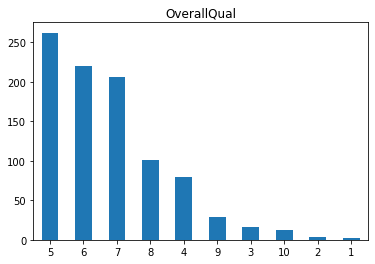

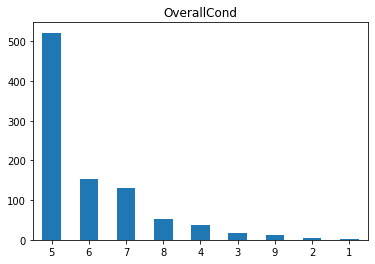

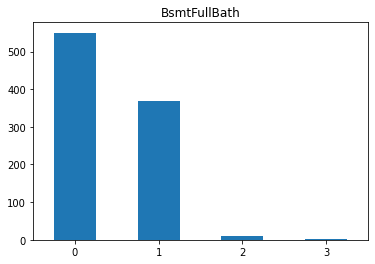

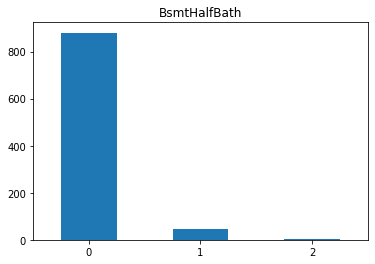

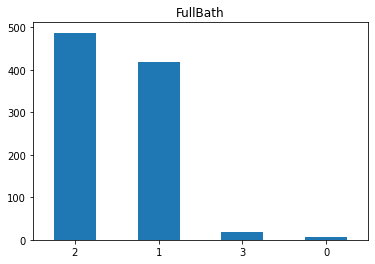

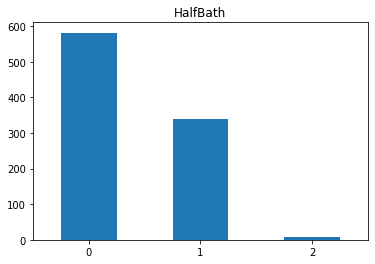

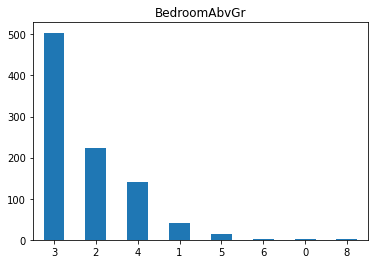

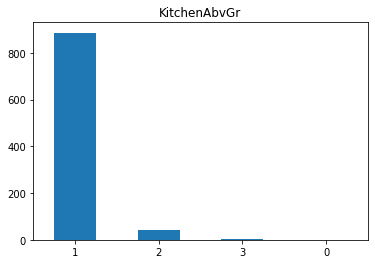

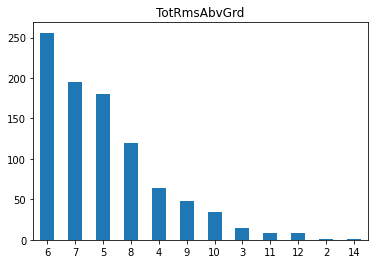

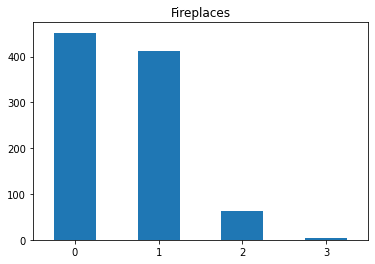

## Feature Engineering